In [1]:
# 문서별 주제 분포에서 확률이 가장 높은 주제를 출력하기 위한 함수
def get_highest_topic(topic_list):
    highest_topic = 100
    highest_prob = 0
    for topic, prob in topic_list:
        if prob > highest_prob:
            highest_prob = prob
            highest_topic = topic
    return highest_topic, highest_prob

In [3]:
import pickle
total_morphs = pickle.load(open('ysy_morphs.p','rb'))  

In [4]:
type(total_morphs)

dict

In [5]:
total_morphs.keys()       # 신문기사의 아이디

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 22

In [6]:
len(total_morphs)

594

In [7]:
print(total_morphs[540]['content'])

['취소', '회견', '예고', '정치', '여론', '제안', '수용', '관측', '그간', '협의', '상황', '이례', '내용', '삼고초려', '표리부동', '요약', '장소', '지방', '협의', '재개', '촉구', '실상', '무산', '책임', '모양새', '보수', '야권', '책임', '호소', '분석', '회견', '야권', '노력', '부각', '완주', '철회', '명분', '요청', '자택', '방문', '태도', '전달', '자세', '강조', '새벽', '실무', '협의', '긍정', '답변', '협상', '결렬', '이유', '성심', '실무', '협상', '회동', '책임', '얘기', '기조', '회견', '배포', '협상', '경과', '제목', '문건', '최진', '상임', '선대위원장', '전화', '교감', '연락', '조건', '제안', '내용', '이태규', '선대', '본부장', '결렬', '통보', '상황', '정리', '여론', '제안', '철회', '만남', '장문', '문자', '메시지', '흉금', '얘기', '진정', '제안', '내용', '배포', '파일', '초기', '제목', '정리', '확인', '협상', '진정', '의구심', '제기', '협상', '한편', '협상', '대비', '결렬', '책임', '대비', '공보', '관계자', '한글', '문서', '피디에프', '예전', '과정', '해프닝', '해명', '협상', '상황', '본인', '이례', '행동', '박빙', '판세', '각종', '여론', '경합', '상태', '상황', '여론', '여론', '제외', '제안', '수용', '입장', '차이', '결렬', '통보', '협상', '의미', '그간', '노력', '부각', '무산', '책임', '경감', '협상', '논란', '아들', '문제', '장제원', '대리인', '행사', '비선', '논란', '협상', '상대', '이태규', '총괄', '선대', '본부', '캠

In [8]:
print(total_morphs[540]['paper_id'])

540


In [9]:
# 2가지 정보를 별도 리스트 변수에 저장
documents =[]
article_ids = []
for key in total_morphs:
    documents.append(total_morphs[key]['content']) # 명사만 추출
    article_ids.append(total_morphs[key]['paper_id'])

In [10]:
# 사용자 불용어 사전을 별도 파일로 저장
f_stop = open('stop_words.txt', 'r', encoding='utf-8')
stop_words = [word.strip() for word in f_stop.readlines()]
f_stop.close()

In [11]:
# 불용어 제거 => 불용어 사전 + 1음절 단어
docs_filtered = [[term for term in doc if term not in stop_words and len(term)>1] for doc in documents]

In [12]:
print(docs_filtered[0])

['화성', '화성시', '동탄', '센트럴파크', '국회', '기자단', '평택', '류미', '이틀', '최대', '승부처', '수도', '막판', '스퍼트', '구리', '하남', '안양', '시흥', '안산', '화성', '오산', '평택', '규모', '유세전', '강동', '중구', '금천', '의정부', '동두천', '파주', '고양', '김포', '부천', '이틀', '연속', '수도', '화력', '집중', '태세', '박빙', '구도', '최대', '표밭', '부동', '밀집', '수도', '민심', '대상', '선택', '집중', '전략', '풀이', '공식', '운동', '수도', '할애', '최대', '실정', '부각', '부동산', '일자리', '문제', '수도', '민심', '반응', '막판', '화력', '집중', '이유', '지사', '시장', '대장동', '개발', '특혜', '의혹', '주요', '공략', '안산시', '단원구', '안산', '문화', '광장', '국회', '기자단', '참여', '독려', '메시지', '경제', '발전', '청사진', '제시', '주력', '지지자', '참여', '당부', '주변', '연세', '거동', '불편', '주권', '행사', '장년', '참여', '심혈', '모습', '부동산', '정책', '실정', '비판', '집권', '공급', '집값', '마련', '지원', '목소리', '시흥', '고생', '이름', '가족', '아버지', '남자', '여자', '결혼', '부동산', '문제', '사회', '구리', '하남', '폭등', '전염', '전국', '고통', '이유', '정치', '지형', '유리', '주택', '정책', '주장', '바보멍충', '원색', '어휘', '비판', '대장', '의혹', '거론', '경제', '하남', '화성', '야권', '파트너', '합류', '야권', '합동', '겨냥', '부끄러움', '자격', '비판', '지원', '사격', '부동산', '정책'

In [13]:
# Create a dictionary representation of the documents
from gensim.corpora import Dictionary
from gensim import models
dictionary = Dictionary(docs_filtered)

In [14]:
# Filter out words that occur in less than 10 documents or more than 10% of the documents
dictionary.filter_extremes(no_below=10, no_above=0.1)   ## 각각의 문서를 벡터로  / no_above는 보통 0.7이나 0.8
# 너무 많은 문서가 너무 적은 문서에서 사용된 단어를 제거 (no_below는 min_df와 같음, no_above는 max_df와 같음)

In [15]:
# DTM 생성
DTM = []
for doc in docs_filtered:
    bow = dictionary.doc2bow(doc)
    DTM.append(bow)

In [16]:
print(dictionary.token2id)

{'가족': 0, '강남역': 1, '고통': 2, '공급': 3, '공략': 4, '구도': 5, '규모': 6, '눈길': 7, '당부': 8, '대신': 9, '대장': 10, '독려': 11, '막판': 12, '메시지': 13, '문화': 14, '민심': 15, '박빙': 16, '반응': 17, '부각': 18, '부동': 19, '부동산': 20, '불편': 21, '산업': 22, '선택': 23, '수도': 24, '승부처': 25, '실정': 26, '안양': 27, '연속': 28, '예정': 29, '유리': 30, '유승민': 31, '의정부': 32, '이름': 33, '이틀': 34, '일대': 35, '일자리': 36, '자격': 37, '적극': 38, '전략': 39, '제시': 40, '주권': 41, '주력': 42, '주변': 43, '주요': 44, '주택': 45, '중구': 46, '지사': 47, '집값': 48, '집권': 49, '창출': 50, '청년': 51, '청와대': 52, '청중': 53, '최대': 54, '캠페인': 55, '태세': 56, '특혜': 57, '파주': 58, '파트너': 59, '풀이': 60, '하남': 61, '합동': 62, '합류': 63, '행사': 64, '홍준표': 65, '화답': 66, '확대': 67, '환호': 68, '강성': 69, '거짓말': 70, '경고': 71, '경험': 72, '공무원': 73, '국정': 74, '기사': 75, '기업': 76, '김연정': 77, '남용': 78, '노동자': 79, '노조': 80, '다수': 81, '도움': 82, '만큼': 83, '매체': 84, '머리': 85, '머슴': 86, '문다영': 87, '물타기': 88, '민간': 89, '방해': 90, '버르장머리': 91, '보상': 92, '부정': 93, '부정부패': 94, '비교': 95, '비리': 96, '비유': 97, '사법': 9

In [17]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(DTM))

Number of unique tokens: 1127
Number of documents: 594


In [18]:
print(DTM[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 2), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 4), (21, 1), (22, 1), (23, 1), (24, 6), (25, 1), (26, 2), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 2), (35, 1), (36, 2), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 2), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 3), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 4), (62, 2), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1)]


In [39]:
NUM_TOPICS = 10 # 찾고자 하는 주제의 수

In [40]:
lda_model = models.ldamodel.LdaModel(corpus=DTM, num_topics=NUM_TOPICS,
                        id2word=dictionary, alpha='auto', eta='auto', iterations = 1000)   # 토픽 모델링 수행
# corpus: 분석하고자 하는 텍스트 데이터의 DTM
# num_topics: 찾고자 하는 주제의 수 
# alpha는 문서별 주제 분포를 나타냄
# eta는 주제별 단어 분포  (auto라고 지정하면, 알아서 가장 데이터를 잘 설명하는 파라미터로 지정해줌)

In [21]:
TOPIC_ID = 0
NUM_TOPIC_WORDS = 10
lda_model.show_topic(TOPIC_ID, NUM_TOPIC_WORDS)
# 채용이라는 단어의 확률값이 가장 큼

[('차별', 0.016213277),
 ('개인', 0.013425483),
 ('구조', 0.013238113),
 ('기업', 0.011333598),
 ('동맹', 0.009366594),
 ('응답', 0.008980688),
 ('여성', 0.008945656),
 ('혁명', 0.008598548),
 ('가치', 0.007737204),
 ('대결', 0.0075260545)]

In [41]:
# 주제별 단어 분포
for topic_id in range(lda_model.num_topics):
    word_probs = lda_model.show_topic(topic_id, NUM_TOPIC_WORDS)
    print("Topic ID: {}".format(topic_id))
    for word, prob in word_probs:
        print("\t{}\t{}".format(word, prob))
    print("\n")

Topic ID: 0
	우크라이나	0.01648634858429432
	러시아	0.009478125721216202
	보복	0.006612665019929409
	협상	0.006292155012488365
	장관	0.006142938509583473
	조작	0.005947809666395187
	대변인	0.005660483613610268
	진영	0.005518082529306412
	김건희	0.005371942184865475
	주가	0.005343014374375343


Topic ID: 1
	여성	0.021976644173264503
	복지	0.010229595936834812
	경찰	0.007987572811543941
	차별	0.007354030851274729
	재원	0.006904978770762682
	구조	0.005827729124575853
	분야	0.005469318479299545
	폐지	0.005277977790683508
	표심	0.005255935247987509
	청년	0.004951496608555317


Topic ID: 2
	김대중	0.016084719449281693
	기업	0.01579488068819046
	노조	0.009105242788791656
	재정	0.007966102100908756
	응답	0.007461711764335632
	강성	0.007403303869068623
	안보	0.007240209262818098
	격차	0.007085586432367563
	생가	0.0070077767595648766
	미국	0.006854049861431122


Topic ID: 3
	수도	0.010710149072110653
	합당	0.00911321584135294
	연금	0.008776738308370113
	표심	0.007738379295915365
	기초	0.007432085927575827
	결집	0.006629721727222204
	최대	0.006573987193405628
	민심	0.0064298282

In [42]:
# 문서별 주제 분포 확인하기
for i in range(10):
    print(article_ids[i])
    topics_list = lda_model.get_document_topics(DTM[i], minimum_probability=0.1)   ## 확률값이 0.1보다 큰 주제만 최종 결과로 리포트
    print(topics_list)
    hi_topic, hi_prob = get_highest_topic(topics_list) # 가장 확률이 높은 주제를 출력합니다.
    print('The most covered topic is Topic {0} and percentage is {1:.2f}'.format(hi_topic, hi_prob), '\n')
# 첫번째 문서는, 세 개의 주제에 대한 확률값만 나온 것

1
[(3, 0.99354094)]
The most covered topic is Topic 3 and percentage is 0.99 

2
[(4, 0.14730701), (6, 0.84607)]
The most covered topic is Topic 6 and percentage is 0.85 

3
[(2, 0.24302796), (8, 0.7470743)]
The most covered topic is Topic 8 and percentage is 0.75 

4
[(0, 0.5719432), (3, 0.1907724), (4, 0.17667526)]
The most covered topic is Topic 0 and percentage is 0.57 

5
[(6, 0.99161404)]
The most covered topic is Topic 6 and percentage is 0.99 

6
[(6, 0.96644133)]
The most covered topic is Topic 6 and percentage is 0.97 

7
[(0, 0.59794635), (1, 0.3727831)]
The most covered topic is Topic 0 and percentage is 0.60 

8
[(1, 0.9496974)]
The most covered topic is Topic 1 and percentage is 0.95 

9
[(4, 0.66957134), (6, 0.1567888), (8, 0.16764294)]
The most covered topic is Topic 4 and percentage is 0.67 

10
[(3, 0.99361074)]
The most covered topic is Topic 3 and percentage is 0.99 



# Log perplexity

In [24]:
lda_model.log_perplexity(DTM)

-7.2521070160265255

In [25]:
start1 = 3
limit1 = 50
step1 = 5
perplexity_scores=[]
for num_topics in range(start1, limit1, step1):
    model = models.ldamodel.LdaModel(DTM, num_topics=num_topics,
                    id2word=dictionary, alpha='auto', eta='auto', iterations=100)
    perplexity_scores.append(model.log_perplexity(DTM))


In [26]:
import matplotlib.pyplot as plt

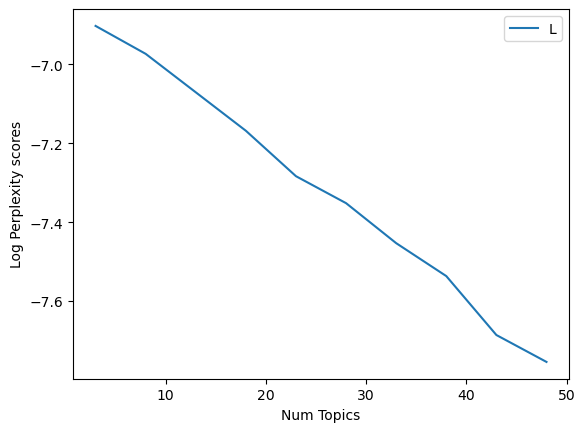

In [27]:
x = range(start1, limit1, step1)
plt.plot(x, perplexity_scores)
plt.xlabel("Num Topics")
plt.ylabel("Log Perplexity scores")
plt.legend(("Log Perplexity"), loc='best')
plt.show()

# Coherence 계산

In [28]:
from gensim.models import CoherenceModel

In [29]:
def compute_coherence_values_umass(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    for num_topics in range(start, limit, step):
        model = models.ldamodel.LdaModel(corpus, num_topics=num_topics,
                        id2word=dictionary, alpha='auto', eta='auto')
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, 
                                        coherence='u_mass', topn=30)
        coherence_values.append(coherencemodel.get_coherence())

    return coherence_values

In [30]:
start1 = 3
limit1 = 63
step1 = 3
coherence_values_umass = compute_coherence_values_umass(dictionary=dictionary, corpus=DTM, texts=docs_filtered, start=start1, limit=limit1, step=step1)

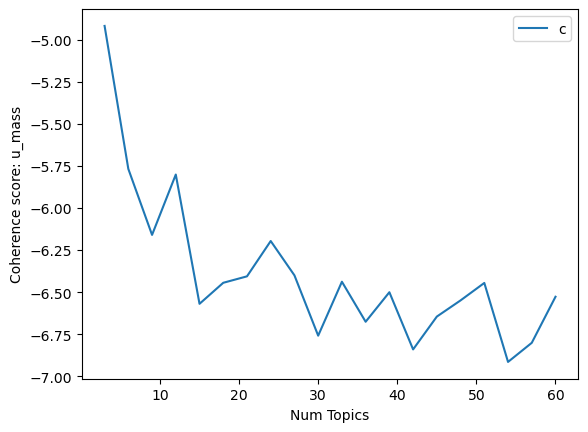

In [31]:
x = range(start1, limit1, step1)   #얘도 그렇게 신뢰가지는 않음 (제일 큰 값을 기준으로, 적절한 주제의 수를 선택하기보다는 확 증가했을 때의 수를 선택하는 게 나을 듯)
plt.plot(x, coherence_values_umass)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score: u_mass")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [32]:
def compute_coherence_values_cv(dictionary, corpus, texts, limit, start=2, step=3):

    coherence_values = []
    for num_topics in range(start, limit, step):
        model = models.ldamodel.LdaModel(corpus, num_topics=num_topics,
                        id2word=dictionary, alpha='auto', eta='auto')
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, 
                                        coherence='c_v', topn=20)
        coherence_values.append(coherencemodel.get_coherence())

    return coherence_values

In [33]:
coherence_values_cv = compute_coherence_values_cv(dictionary=dictionary, corpus=DTM, texts=docs_filtered, start=start1, limit=limit1, step=step1)

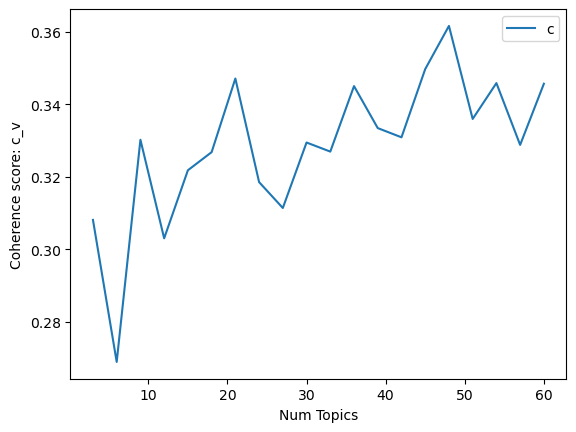

In [34]:
x = range(start1, limit1, step1)
plt.plot(x, coherence_values_cv)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score: c_v")
plt.legend(("coherence_values"), loc='best')
plt.show()

# pyLDAvis를 이용해서 시각화해보기

In [46]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

In [47]:
prepared_data = gensimvis.prepare(lda_model, DTM, dictionary)

In [48]:
pyLDAvis.display(prepared_data)

In [49]:
pyLDAvis.save_html(prepared_data, 'ysy_LDAvis.html')
# 확장자가 html이니까 브라우저를 통해 실행하는 것이 좋음